# PHYS 105: Computational Physics I
### Spring 2018
### In-Class Exercise 2.3

Name: Christopher Morris

A particle moves in one dimension on a non-periodic oscillatory
trajectory described by
$$
	x(t) = J_0(t^2),
$$
where the function $J_0(s)$ (a Bessel function) is available through

    from scipy.special import jn
    y = jn(0, s)


**Instructions**:

  * **Plot** the trajectory of the particle for $0\le t_i\le 10$, with
$t_i=i\ \tt dt$ and $\tt dt = 0.05$.


  * Using the above value of $\tt dt$, **determine** the first *three* 
  times the particle crosses $x=0$ **from below** (from negative $x$).  Use linear
interpolation to refine your answers.


The first three non-interpolated times the particle crosses x=0
from below is t = 2.3499999999999996, 3.4499999999999957, and 4.299999999999993

The first threee thime linearly interpolated the particle crosses x=0
from below is t = 2.3494856142822225, 3.4338847288728322, and 4.251042812938792


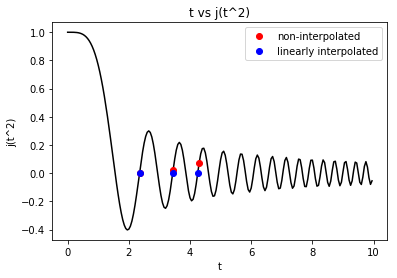

In [2]:
import matplotlib.pyplot as plt
from scipy.special import jn

def x(t):
    return jn(0, t**2)

def interp(x0, y0, x1, y1, x=None, y=None):
    if y == None:
        return y0 + (y1 - y0) * (x - x0) / (x1 - x0)
    elif x == None:
        return (y-y0) * (x1 - x0) / (y1 - y0) + x0

dt = .05
t = 0
t_list =[]
x_list =[]
t_cross = []
x_cross = []
t_cross_interpolated = []

count = 0
while t<=10:
    t_list.append(t)
    x_list.append(x(t))
    t += dt
    
    if count != 3:
        if (x(t-dt) <= 0) and (x(t) >= 0):
            t_cross.append(t)
            x_cross.append(x(t))
            t_cross_interpolated.append(interp(t-dt, x(t-dt), t, x(t), y = 0))
            count += 1
            
    
print('The first three non-interpolated times the particle crosses x=0' 
       + '\nfrom below is t = {}, {}, and {}'.format(t_cross[0], t_cross[1], t_cross[2]))

print('\nThe first threee thime linearly interpolated the particle crosses x=0'
     + '\nfrom below is t = {}, {}, and {}'.format(t_cross_interpolated[0], t_cross_interpolated[1], t_cross_interpolated[2]))
    

plt.plot(t_list, x_list, 'k-')
plt.plot(t_cross, x_cross, 'ro', label = 'non-interpolated')
plt.plot(t_cross_interpolated, [0,0,0], 'bo', label = 'linearly interpolated')
plt.xlabel('t')
plt.ylabel('j(t^2)')
plt.title('t vs j(t^2)')
plt.legend()